In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
from fbprophet import Prophet
from google.colab import drive
!pip install nb_black -q

     |████████████████████████████████| 133kB 5.3MB/s 
     |████████████████████████████████| 747kB 6.6MB/s 
     |████████████████████████████████| 727kB 14.4MB/s 


In [ ]:
crime_data = pd.read_csv('/content/Chicago_Crime_Processed_Data.csv')

In [ ]:
crime_data.shape

(2082194, 20)

In [ ]:
crime_data.head()

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column
0,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,2015,41.815117,-87.670000,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,South,1640154.0
1,0870,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,2015,41.895080,-87.765400,9,4,11,Friday,THEFT,North,2327482.0
2,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,2015,41.937406,-87.716650,9,5,12,Saturday,NARCOTIC_OFFENSE,West,661033.0
3,0560,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,2015,41.881903,-87.755121,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,North,1640154.0
4,0610,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,2015,41.744379,-87.658431,9,5,10,Saturday,THEFT,South,2327482.0


In [ ]:
crime_data.apply(lambda x: sum(x.isnull()),axis=0)

IUCR                        0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
Year                        0
Latitude                    0
Longitude                   0
Month                       0
Day_num                     0
Time                        0
day_of_week                 0
primary_type_grouped      248
zone                        1
Count_CrimeType_Column    249
dtype: int64

In [ ]:
crime=crime_data[['District','Ward','Community Area','Latitude','Longitude','Month','Year','Time','zone','Location Description','Beat']]

In [ ]:
crime["Community Area"].fillna(0, inplace = True)
crime["Location Description"].fillna(0, inplace = True)
crime["Longitude"].fillna(0, inplace = True)
crime["Latitude"].fillna(0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
crime.apply(lambda x: sum(x.isnull()),axis=0)

District                0
Ward                    0
Community Area          0
Latitude                0
Longitude               0
Month                   0
Year                    0
Time                    0
zone                    1
Location Description    0
Beat                    0
dtype: int64

In [ ]:
crime[crime['zone'] != 'null']

,District,Ward,Community Area,Latitude,Longitude,Month,Year,Time,zone,Location Description,Beat
0,9.0,12.0,61.0,41.815117,-87.670000,9,2015,13,South,RESIDENCE,924
1,15.0,29.0,25.0,41.895080,-87.765400,9,2015,11,North,CTA BUS,1511
2,14.0,35.0,21.0,41.937406,-87.716650,9,2015,12,West,SIDEWALK,1412
3,15.0,28.0,25.0,41.881903,-87.755121,9,2015,13,North,APARTMENT,1522
4,6.0,21.0,71.0,41.744379,-87.658431,9,2015,10,South,RESIDENCE,614
...,...,...,...,...,...,...,...,...,...,...,...
2082189,7.0,15.0,67.0,41.776896,-87.670229,5,2004,20,South,SIDEWALK,726
2082190,2.0,4.0,35.0,41.828690,-87.613413,5,2004,12,East,CHA HALLWAY/STAIRWELL/ELEVATOR,212
2082191,10.0,12.0,30.0,41.847871,-87.696403,6,2004,8,West,"SCHOOL, PUBLIC, BUILDING",1033
2082192,2.0,4.0,40.0,41.799979,-87.606345,6,2004,10,South,GOVERNMENT BUILDING/PROPERTY,234


In [ ]:
crime_null = crime[crime.isna().any(axis=1)]

In [ ]:
crime_null

,District,Ward,Community Area,Latitude,Longitude,Month,Year,Time,zone,Location Description,Beat
2082193,5.0,34.0,53.0,41.671313,-87.645348,6,2004,23,NaN,STREET,524


In [ ]:
crime=crime[crime['Ward'] != 8475075]

In [ ]:
crime.apply(lambda x: sum(x.isnull()),axis=0)

District                0
Ward                    0
Community Area          0
Latitude                0
Longitude               0
Month                   0
Year                    0
Time                    0
zone                    1
Location Description    0
Beat                    0
dtype: int64

In [ ]:
minimum_X = crime['Latitude'].min()
minimum_Y = crime['Longitude'].min()
crime['Latitude'] = (crime['Latitude'] - minimum_X)
crime['Longitude'] = (crime['Longitude'] - minimum_Y)

In [ ]:
crime_data.isna().sum()

IUCR                        0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
Year                        0
Latitude                    0
Longitude                   0
Month                       0
Day_num                     0
Time                        0
day_of_week                 0
primary_type_grouped      248
zone                        1
Count_CrimeType_Column    249
dtype: int64

In [ ]:
import plotly.express as px


def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    figure = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq")
    figure.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    figure.update_layout(title_text=title)
    figure.show()


plot_counts(crime_data["primary_type_grouped"], "Kind of Crimes")


In [ ]:
plot_counts(crime_data["Location Description"], "Location of Crimes")

In [ ]:
futurePrediction = crime_model.make_future_dataframe(periods=300)
futureForecast = crime_model.predict(futurePrediction)
futureForecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,-1184.711418,-9100.579994,5429.574062,-1184.711418,-1184.711418,-49.765367,-49.765367,-49.765367,-49.765367,-49.765367,-49.765367,0.0,0.0,0.0,-1234.476785
1,2001-02-28,-1158.028043,-9122.601831,6444.516660,-1158.028043,-1158.028043,-252.551135,-252.551135,-252.551135,-252.551135,-252.551135,-252.551135,0.0,0.0,0.0,-1410.579179
2,2001-03-31,-1128.485735,-9054.118280,6598.888215,-1128.485735,-1128.485735,53.293916,53.293916,53.293916,53.293916,53.293916,53.293916,0.0,0.0,0.0,-1075.191819
3,2001-04-30,-1099.896405,-8691.109633,6357.313475,-1099.896405,-1099.896405,-5.682593,-5.682593,-5.682593,-5.682593,-5.682593,-5.682593,0.0,0.0,0.0,-1105.578998
4,2001-05-31,-1070.354097,-8510.844078,6973.160335,-1070.354097,-1070.354097,161.981996,161.981996,161.981996,161.981996,161.981996,161.981996,0.0,0.0,0.0,-908.372101


In [ ]:
import plotly.graph_objects as go

# Create random data with numpy

# Create traces
figure = go.Figure()
figure.add_trace(
    go.Scatter(
        x=futureForecast["ds"], y=futureForecast["yhat"], mode="lines", name="Predict Values"
    )
)
figure.add_trace(
    go.Scatter(x=futureForecast["ds"], y=futureForecast["trend"], mode="lines", name="Trend")
)
figure.add_trace(
    go.Scatter(
        x=crimesInChicago_data_model["ds"], y=crimesInChicago_data_model["y"], mode="lines+markers", name="Real Values",
    )
)
figure.update_layout(
    title_text="Comperating the real x predicted",
    yaxis_title="Crime counts",
    xaxis_title="Date",
)


figure.show()

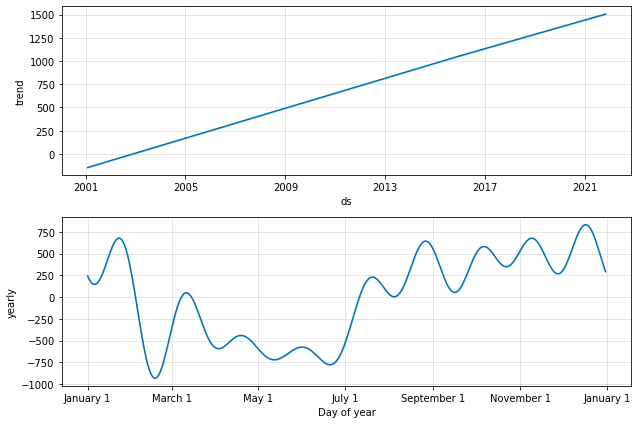

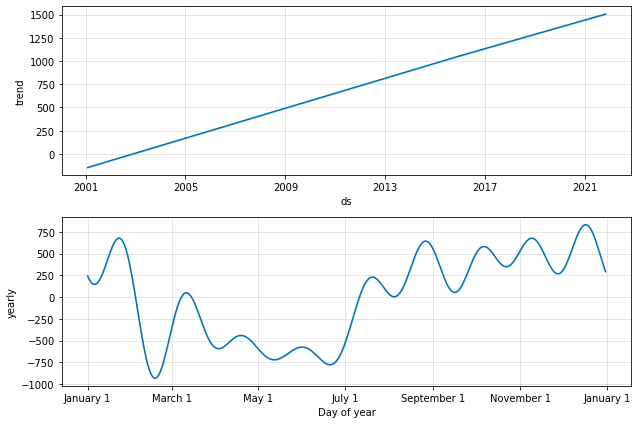

In [ ]:
crime_model.plot_components(futureForecast)